In [1]:
import keras

from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data() 

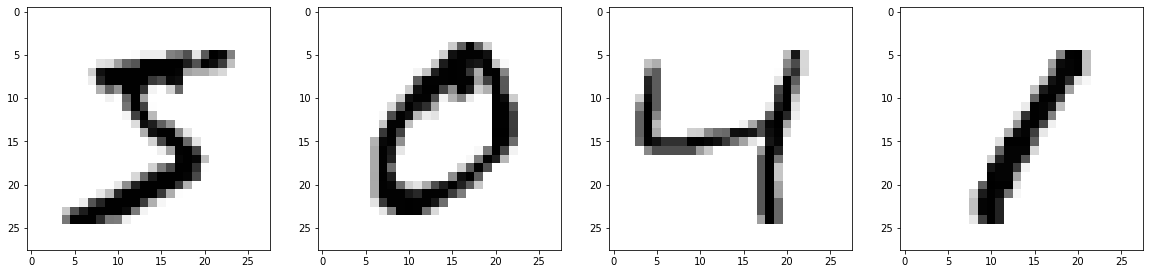

In [3]:
X_train_ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train_[i], cmap='binary')
    

In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
img_rows , img_cols = 28, 28

In [6]:
num_category = 10

In [7]:
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_category, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
batch_size = 128
num_epoch = 15
model_log =model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split = 0.20)

Epoch 1/10
375/375 [==============================] - 29s 76ms/step - loss: 0.3739 - accuracy: 0.8845 - val_loss: 0.0851 - val_accuracy: 0.9760
Epoch 2/10
375/375 [==============================] - 29s 76ms/step - loss: 0.1216 - accuracy: 0.9637 - val_loss: 0.0551 - val_accuracy: 0.9843
Epoch 3/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0904 - accuracy: 0.9726 - val_loss: 0.0476 - val_accuracy: 0.9858
Epoch 4/10
375/375 [==============================] - 33s 89ms/step - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0408 - val_accuracy: 0.9884
Epoch 5/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0607 - accuracy: 0.9818 - val_loss: 0.0426 - val_accuracy: 0.9886
Epoch 6/10
375/375 [==============================] - 31s 82ms/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 7/10
375/375 [==============================] - 33s 87ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0363 - val_accuracy:

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [13]:
model_log1 =model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split = 0.20)

Epoch 1/10
375/375 [==============================] - 32s 85ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0341 - val_accuracy: 0.9912
Epoch 2/10
375/375 [==============================] - 30s 79ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0350 - val_accuracy: 0.9919
Epoch 3/10
375/375 [==============================] - 30s 80ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0350 - val_accuracy: 0.9913
Epoch 4/10
375/375 [==============================] - 30s 80ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.0310 - val_accuracy: 0.9929
Epoch 5/10
375/375 [==============================] - 30s 81ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9925
Epoch 6/10
375/375 [==============================] - 29s 78ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0350 - val_accuracy: 0.9921
Epoch 7/10
375/375 [==============================] - 30s 79ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0359 - val_accuracy:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02454879879951477
Test accuracy: 0.9934999942779541


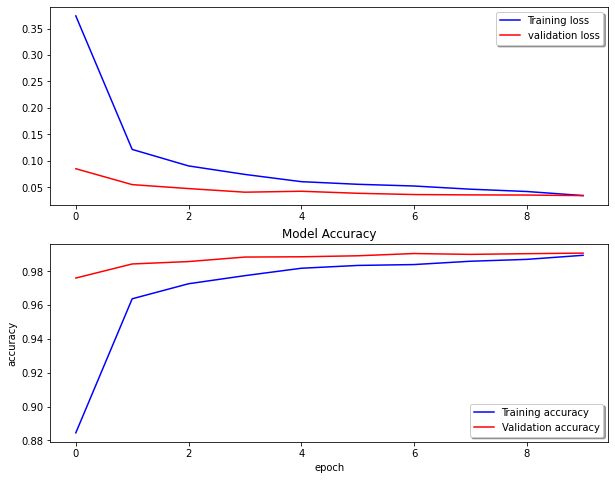

In [23]:
fig, ax = plt.subplots(2,1, figsize=(10, 8))

ax[0].plot(model_log.history['loss'], color='b', label="Training loss")
ax[0].plot(model_log.history['val_loss'], color='r', label="validation loss")
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_log.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(model_log.history['val_accuracy'], color='r',label="Validation accuracy")
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

legend = ax[1].legend(loc='best', shadow=True)


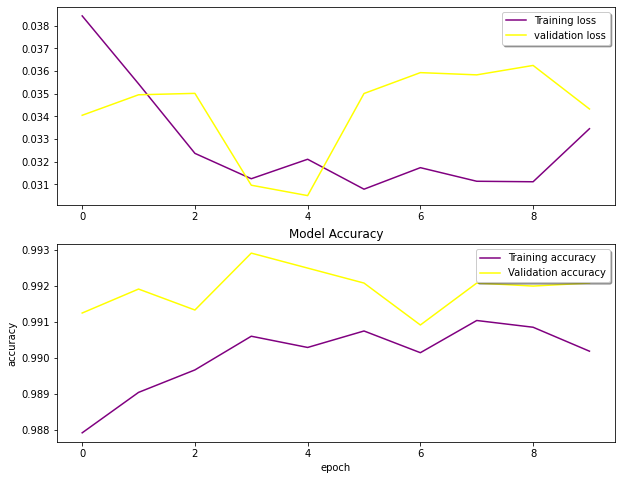

In [17]:
fig, ax = plt.subplots(2,1, figsize=(10, 8))

ax[0].plot(model_log1.history['loss'], color='purple', label="Training loss")
ax[0].plot(model_log1.history['val_loss'], color='yellow', label="validation loss")
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_log1.history['accuracy'], color='purple', label="Training accuracy")
ax[1].plot(model_log1.history['val_accuracy'], color='yellow',label="Validation accuracy")
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

legend = ax[1].legend(loc='best', shadow=True)


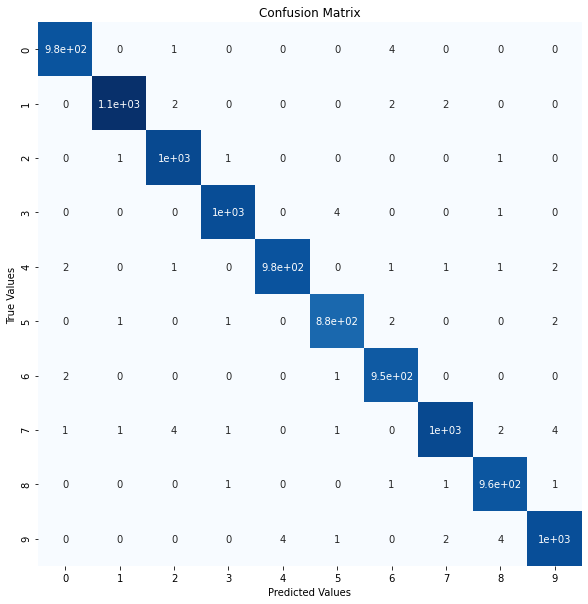

In [18]:
fig = plt.figure(figsize=(10, 10)) 

y_pred = model.predict(X_test) 
Y_pred = np.argmax(y_pred, 1) 
Y_test = np.argmax(y_test, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

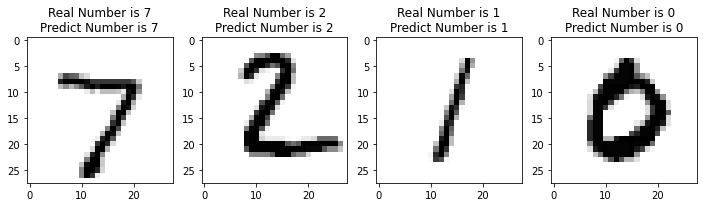

In [19]:
y_pred = model.predict(X_test)
X_test_ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [25]:
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


Contribution:
I included predication part and evaluation metrics with hyper parameter tunning(epoch)
Reference:
•	https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
•	https://www.kaggle.com/raoulma/mnist-image-class-tensorflow-cnn-99-51-test-acc
